In [1]:
import fipy as fp

In [2]:
from fipy import numerix as nmx

In [3]:
dx = 1.0
Lx = 96.
r0 = 8.

In [4]:
mesh = fp.Grid1D(dx=dx, Lx=Lx)

In [5]:
u = fp.CellVariable(mesh=mesh, name="u", hasOld=True)

In [6]:
phi = fp.CellVariable(mesh=mesh, name=r"$\varphi$", hasOld=True)

In [7]:
r = nmx.sqrtDot(mesh.cellCenters, mesh.cellCenters)

In [33]:
D = 10.
tau0 = 1.
W0 = 1.
lamda = D * tau0 / (0.6267 * W0**2)
norm = phi.grad / (phi.grad.mag + (phi.grad.mag == 0.) * 1.)
theta = fp.Variable(0.)
theta.name = r"$\theta$"
m = fp.Variable(4)
epsilon = fp.Variable(0.05)
a = 1 + epsilon * nmx.cos(m * theta)
aPrime = -epsilon * nmx.sin(m * theta) * m
tau = tau0 * a**2
W = W0 * a
Wprime = W0 * aPrime
Dphi = W**2
Delta = fp.Variable(value=0.3, name=r"$\Delta$")

In [21]:
u.constrain(-Delta, where=mesh.facesRight)

In [22]:
m.value = 4

In [23]:
ueq = (fp.TransientTerm(coeff=1., var=u) 
       == fp.DiffusionTerm(coeff=D, var=u)
       + fp.TransientTerm(coeff=0.5, var=phi))

In [24]:
phieq = (fp.TransientTerm(coeff=tau, var=phi)
         == fp.DiffusionTerm(coeff=Dphi, var=phi)
         + fp.ImplicitSourceTerm(coeff=1-phi**2, var=phi)
         - fp.ImplicitSourceTerm(coeff=lamda * (1 - 2*phi**2 + phi**4), var=u))

In [25]:
eq = ueq & phieq

In [26]:
phi.value = -1
phi.setValue(+1, where=r <= r0)

In [27]:
u.value = -Delta

In [28]:
faceNorm = phi.faceGrad / (phi.faceGrad.mag + (phi.faceGrad.mag == 0.) * 1.)
faceNorm.name = r"$\hat{n}$"
curvature = faceNorm.divergence
curvature.name = r"$\kappa$"

In [29]:
radius = 1. / curvature
radius.name = r"$\rho$"

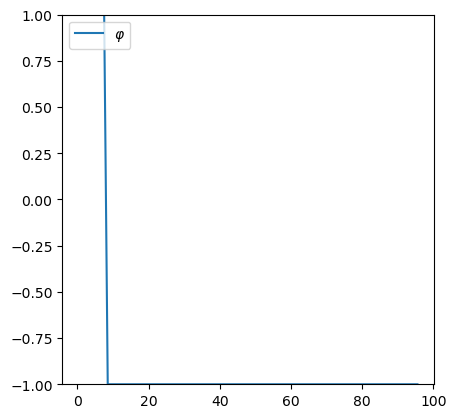

In [30]:
phiviewer = fp.Viewer(vars=phi, datamin=-1, datamax=1)

/Users/guyer/Documents/research/FiPy/fipy/fipy/variables/variable.py:1146: RuntimeWarning: divide by zero encountered in divide
  return self._BinaryOperatorVariable(lambda a, b: b / a, other)
/Users/guyer/Documents/research/FiPy/fipy/fipy/variables/variable.py:1120: RuntimeWarning: invalid value encountered in multiply
  return self._BinaryOperatorVariable(lambda a, b: a*b, other)


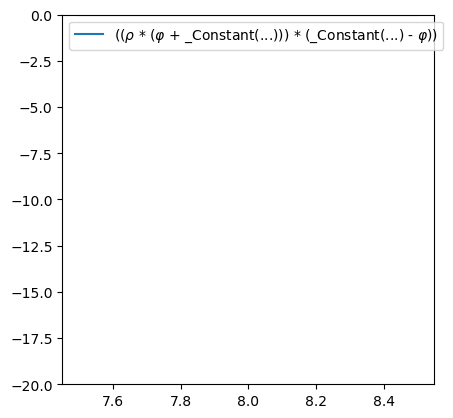

In [24]:
radviewer = fp.Viewer(vars=radius *(1 + phi) * (1-phi), datamin=-20, datamax=0)

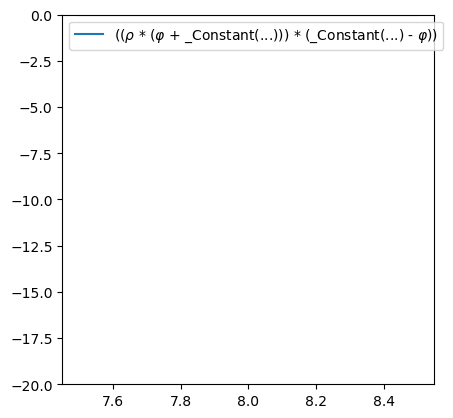

In [25]:
radviewer.plot()

In [83]:
fp.tools.dump.write(mesh, "mesh.gz")

In [84]:
tsv = fp.TSVViewer(vars=(phi, u))

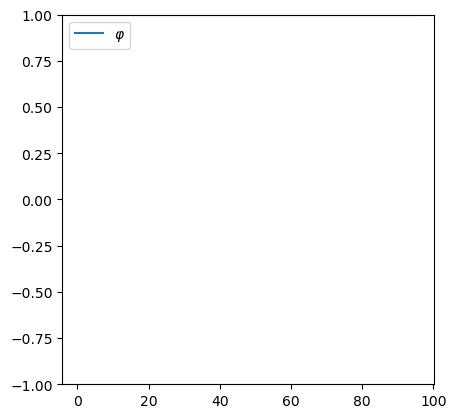

In [31]:
for step in nmx.arange(15000):
    phi.updateOld()
    u.updateOld()
    for sweep in range(3):
        res = eq.sweep(dt=.1)
        # print(step, sweep, res)
    if step % 100 == 0:
    #     tsv.plot(filename="%d.txt.gz" % step)
        phiviewer.plot()

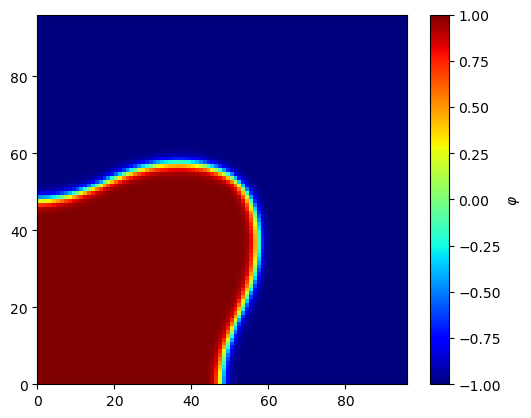

In [75]:
phiviewer.plot()

In [76]:
step

1530